In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('train.csv')


           SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


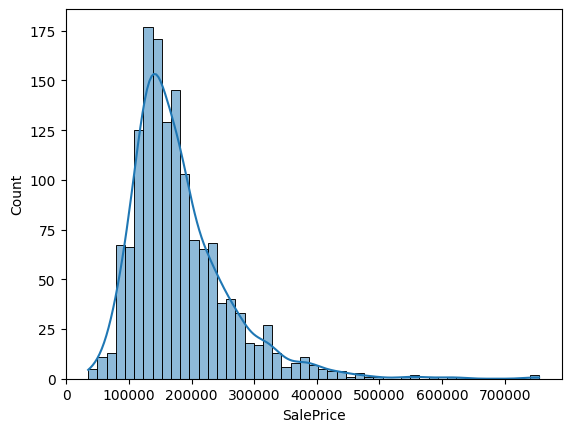

In [ ]:
print(df[['SalePrice']].describe())
sns.histplot(df['SalePrice'], kde=True)
plt.show()

In [4]:
features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']
df = df[features + ['SalePrice']].dropna()

X = df[features]
y = df['SalePrice']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", dict(zip(features, model.coef_)))
print("Intercept:", model.intercept_)
print(f"MAE = {mae:.2f}, RMSE = {rmse:.2f}, R² = {r2:.3f}")

Coefficients: {'GrLivArea': np.float64(47.1360188790743), 'TotalBsmtSF': np.float64(33.17354341850401), 'OverallQual': np.float64(28203.610103651066)}
Intercept: -98427.32987875203
MAE = 25856.65, RMSE = 40836.96, R² = 0.783


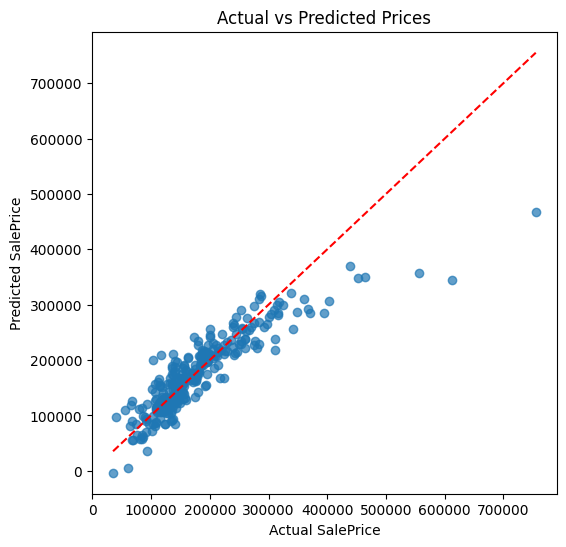

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Prices')
plt.show()
